In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

from utils import join_run_values

In [2]:
base_dir = '../build/out'
run_folder_names = [f for f in os.listdir(base_dir) if f.startswith('06_flips_r')]

# Load Metrics

In [3]:
rep_metric_dfs = []
rep_data_dfs = []
for rfm in run_folder_names:
    
    root_folder = os.path.join(base_dir, rfm)
    rep_id = int(rfm.split('r')[1])
    
    meshestxt = root_folder + '/plots/meshes.txt'
    run_names = [l[:-1] for l in open(meshestxt, "r").readlines()]

    # CELL-BASED TRIANGULATION METRICS
    run_metrics = {}
    run_orbitpoints = {}
    for run_name in run_names:
        metrics_file     = os.path.join(root_folder, '{}metrics.csv'.format(run_name))
        orbitpoints_file = os.path.join(root_folder, '{}orbitpoints.csv'.format(run_name))

        # print(os.path.exists(metrics_file), os.path.exists(orbitpoints_file))
        run_metrics[run_name] = pd.read_csv(metrics_file)
        run_orbitpoints[run_name] = pd.read_csv(orbitpoints_file)

    # HEAT VALUES
    run_data = {}
    for r_idx, run_name in enumerate(run_names):
        # print('{}/{}'.format(r_idx+1, len(run_names)))
        _, cellSize, rerat, facetSize, lloyd, perturb, exude, minorbitpoints, nflips, _ = run_name.split('_')
        if (minorbitpoints == 0):
            print('No orbitpoints, no heatvals, skip...')
            continue
        try:
            #print('-----------')
            csv_path = os.path.join(root_folder, 'plots/{}heatvals.csv'.format(run_name))
            # print(csv_path)

            origin_index  = pd.read_csv(csv_path, header=None, skiprows=1, nrows=1).values[0][0]
            orbit_indices = list(pd.read_csv(csv_path, header=None, skiprows=3, nrows=1).values[0])
            #print(run_orbitpoints[run_name]['orbit_idx'].sort_values().tolist()[1:])
            #print(orbit_indices)
            # print(list(pd.read_csv(csv_path, header=None, skiprows=3, nrows=1)))
            heat_values   = pd.read_csv(csv_path, skiprows=4)
            orbit_heat_vals = heat_values.iloc[run_orbitpoints[run_name]['orbit_idx'].sort_values().tolist()[1:]] # heat_values.iloc[orbit_indices]
            run_data[run_name] = orbit_heat_vals
        except:
            print("heat falue file for {} missing".format(run_name))
            
    metric_df = join_run_values(run_metrics, run_orbitpoints, run_names)
    data_df = join_run_values(run_data, run_orbitpoints, run_names)
    
    # display(metric_df.groupby('nflips').mean())
    
    metric_df['rep_id'] = [rep_id] * metric_df.shape[0]
    data_df['rep_id']   = [rep_id] * data_df.shape[0]
    
    rep_metric_dfs.append(metric_df)
    rep_data_dfs.append(data_df)
    
mdf = pd.concat(rep_metric_dfs,ignore_index=True)
ddf = pd.concat(rep_data_dfs,ignore_index=True)

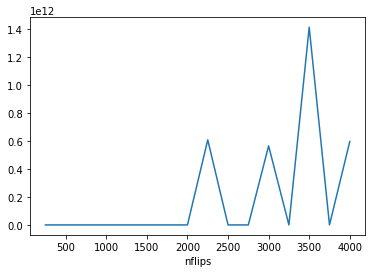

In [29]:
mdf[mdf['rep_id'] == 0].groupby('nflips')['amips'].mean().plot()
plt.show()

# CELL-BASED METRICS

In [5]:
from utils import join_run_values
# metric_df = join_run_values(run_metrics, run_orbitpoints, run_names)
display(metric_df.groupby('nflips').mean())

,minangle,amips,volume,cellSize,lloyd,perturb,exude,minorbitpoints,n_orbitpoints,max_shift,rep_id
nflips,,,,,,,,,,,
250,46.121585,5.725166e+01,0.000048,0.06,False,False,False,20,22,0.000721,0
500,45.928343,5.895622e+01,0.000048,0.06,False,False,False,20,22,0.000721,0
750,45.746994,6.501248e+01,0.000048,0.06,False,False,False,20,22,0.000721,0
1000,45.547470,7.154079e+01,0.000048,0.06,False,False,False,20,22,0.000721,0
1250,45.362911,6.456885e+01,0.000048,0.06,False,False,False,20,22,0.000721,0
1500,45.170211,6.598946e+01,0.000048,0.06,False,False,False,20,22,0.000721,0
1750,44.986571,7.687832e+01,0.000047,0.06,False,False,False,20,22,0.000721,0
2000,44.807132,7.581094e+01,0.000047,0.06,False,False,False,20,22,0.000721,0
2250,44.625079,6.077341e+11,0.000047,0.06,False,False,False,20,22,0.000721,0


### Metrics BY

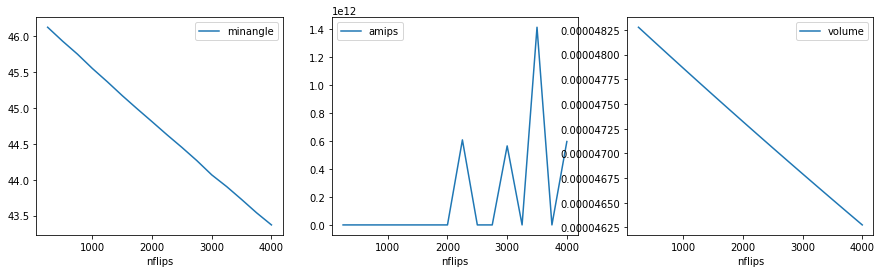

In [6]:
b_var = 'nflips'
avg_by_size = metric_df.groupby(b_var).mean().sort_index()

fig = plt.figure(figsize=(15, 4))
axes = fig.subplots(nrows=1, ncols=3)
avg_by_size.plot(y='minangle', ax=axes[0])
avg_by_size.plot(y='amips',    ax=axes[1])
avg_by_size.plot(y='volume',   ax=axes[2])
plt.show()

# HEAT VALUES

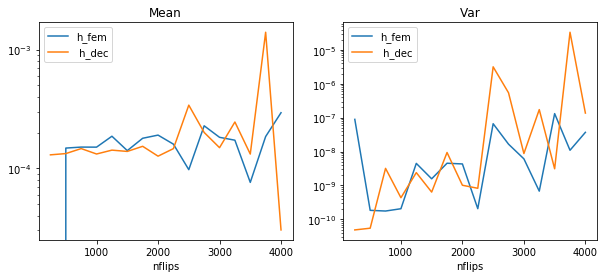

In [9]:
b_var = 'nflips'

fig = plt.figure(figsize=(10, 4))
axes = fig.subplots(nrows=1, ncols=2)
data_df.groupby(b_var)[['h_fem', ' h_dec']].mean().plot(logy=True, ax=axes[0])
axes[0].set_title('Mean')
data_df.groupby(b_var)[['h_fem', ' h_dec']].var().plot(logy=True, ax=axes[1])
axes[1].set_title('Var')
plt.show()

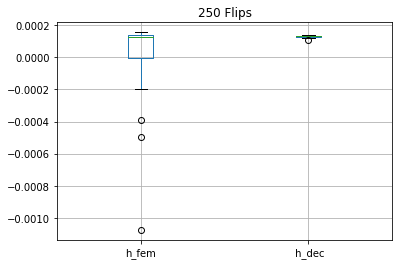

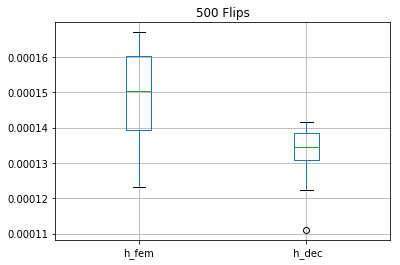

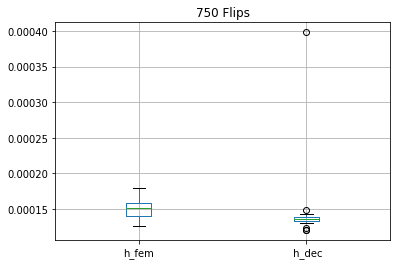

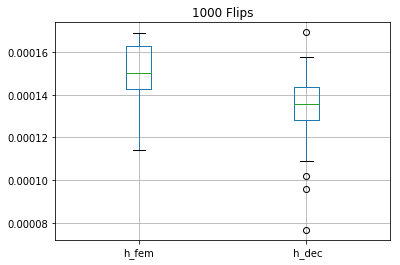

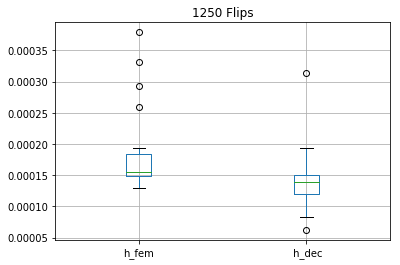

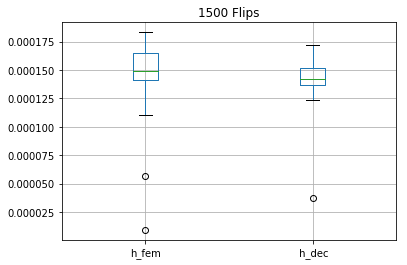

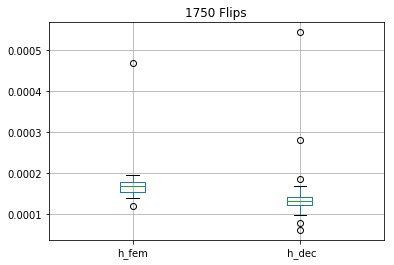

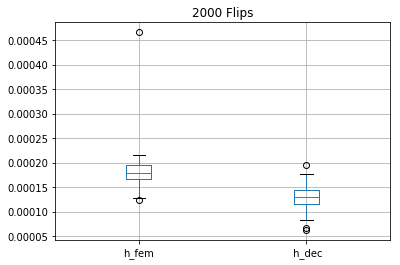

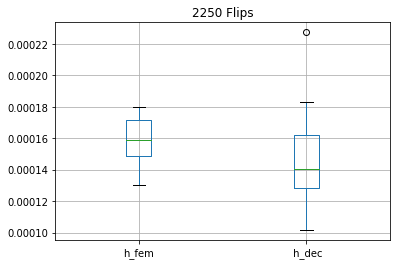

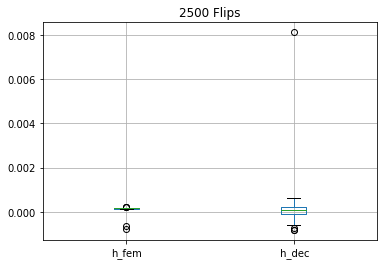

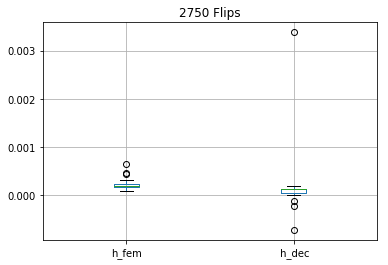

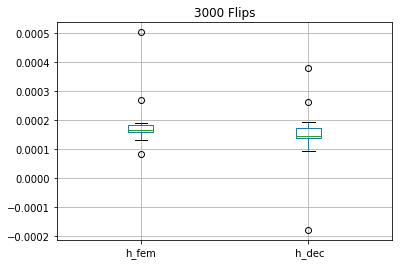

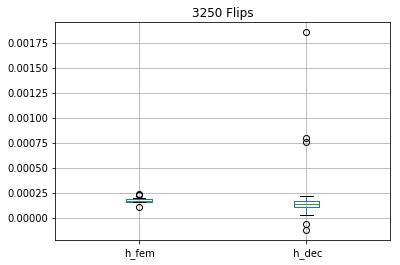

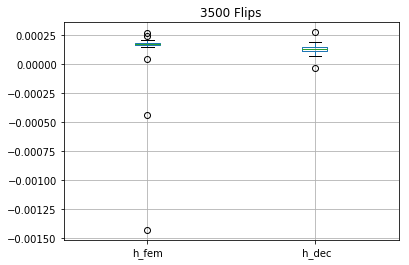

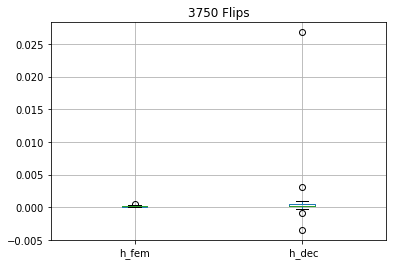

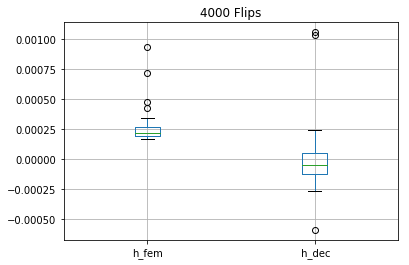

In [12]:
for nf in list(data_df['nflips'].unique()):
    data_df[data_df['nflips'] == nf][['h_fem', ' h_dec']].boxplot()
    plt.title('{} Flips'.format(nf))
    plt.show()